In [2]:
"""
CSE 151B Project Notebook
"""

'\nCSE 151B Project Notebook\n'

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.utils
from torchvision import datasets
from torchvision.transforms import ToTensor 

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import time

In [4]:
def distance(p1, p2):
    if isinstance(p1[0], str):
        return np.sqrt((float(p2[0])-float(p1[0]))**2+(float(p2[1])-float(p1[1])**2))
    else:
        return np.sqrt((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)

def normalize_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

def convert_string_to_list(string):
    return eval(string)

In [16]:
ogdata = pd.read_csv("train.csv")
ogdata.head(1);

In [42]:
# data["Count"] = data['POLYLINE'].apply(len)
data = ogdata.copy()
odata = data.copy()
data = data[data['MISSING_DATA']==False]
data["Count"] = data['POLYLINE'].apply(lambda x: max(x.count("[") - 1, 0))
data["Travel Time (s)"] = data['Count']*15
data["Travel Time (m)"] = data['Travel Time (s)']/60
data['Time'] = pd.to_datetime(data['TIMESTAMP'], unit='s')
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month
data['Day of Month'] = data['Time'].dt.day
data['Day of Week'] = data['Time'].dt.day_name()
data['Hour'] = data['Time'].dt.hour

In [43]:
features = data[['CALL_TYPE', 'ORIGIN_STAND', 'TAXI_ID', 'DAY_TYPE', 'Year', 'Month', 'Day of Month', 'Day of Week', 'Hour']]
target = data['Travel Time (s)']
test_size = 0.2
seed = 69
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=seed)

In [44]:
# Transform and preprocess

cat_features = ['Hour', 'Day of Week', 'Month', 'TAXI_ID', 'Day of Month', 'Year', 'CALL_TYPE']

# Preprocess with one-hot-encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features)
    ])

x_train = preprocessor.fit_transform(x_train)

# Transform the test data
x_test = preprocessor.transform(x_test)

In [57]:
# Create and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(5, 5)
                    , activation='relu'
                    , solver='adam'
                    , random_state=42
                    , max_iter=10
                    , batch_size=128
                    , learning_rate='constant'
                    , learning_rate_init=0.000001
                    , momentum=0.9
                  )

# Start time
start_time = time.time()

mlp.fit(x_train, y_train)

# Make predictions
y_pred = mlp.predict(x_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
    
# Get Total Training Time
training_time = time.time() - start_time
print("Training Time:", training_time)

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE: 1008.575803381701
Training Time: 137.22490811347961


In [58]:
lossn6 = mlp.loss_curve_

In [56]:
lossn5 = mlp.loss_curve_

In [54]:
lossn4 = mlp.loss_curve_

In [52]:
lossn3 = mlp.loss_curve_

In [64]:
loss_df = pd.DataFrame({"Epoch":range(1,11)})
loss_df['10E-3'] = lossn3
loss_df['10E-4'] = lossn4
loss_df['10E-5'] = lossn5
loss_df['10E-6'] = lossn6
loss_df['10E-3'] = loss_df['10E-3'].apply(np.sqrt)
loss_df['10E-4'] = loss_df['10E-4'].apply(np.sqrt)
loss_df['10E-5'] = loss_df['10E-5'].apply(np.sqrt)
loss_df['10E-6'] = loss_df['10E-6'].apply(np.sqrt)
loss_df

,Epoch,10E-3,10E-4,10E-5,10E-6
0,1,503.512959,691.273270,707.212133,707.442753
1,2,471.045049,584.274835,706.622338,707.391712
2,3,469.756595,485.215589,705.705103,707.338735
3,4,469.043038,479.480007,704.355460,707.288450
4,5,468.529513,477.845719,702.494687,707.243226
5,6,468.106112,476.546056,700.050719,707.200900
6,7,467.752656,475.457908,696.948355,707.157776
7,8,467.445982,474.547435,693.118721,707.112560
8,9,467.194426,473.781009,688.498649,707.065096
9,10,466.988272,473.136325,683.030056,707.015454


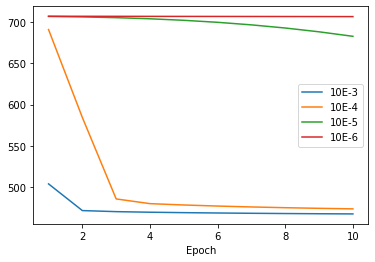

In [66]:
loss_df.plot(x='Epoch', y=['10E-3', '10E-4', '10E-5', '10E-6']);

In [36]:
import pickle
# save the model to disk
filename = 'mlp1_model.sav'
pickle.dump(mlp, open(filename, 'wb')) 

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [37]:
loaded_model

MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=10, random_state=42)

In [34]:
out_df = pd.DataFrame({"x_test": x_test, "y_test": y_test, "y_pred": y_pred})
out_df.shape

,x_test,y_test,y_pred
59534,"(0, 1)\t1.0\n (0, 26)\t1.0\n (0, 37)\t1.0\...",255,581.292645
1189909,"(0, 6)\t1.0\n (0, 27)\t1.0\n (0, 33)\t1.0\...",15,421.719010
505151,"(0, 3)\t1.0\n (0, 24)\t1.0\n (0, 40)\t1.0\...",555,697.702752
1069703,"(0, 17)\t1.0\n (0, 29)\t1.0\n (0, 32)\t1.0...",1800,949.161035
945082,"(0, 9)\t1.0\n (0, 29)\t1.0\n (0, 31)\t1.0\...",585,732.552445


In [18]:
validation_orig = pd.read_csv("test_public.csv")
validation = validation_orig.copy()

In [26]:
def transformdf(df):
    data = df.copy()
    data = data[data['MISSING_DATA']==False]
    data['Time'] = pd.to_datetime(data['TIMESTAMP'], unit='s')
    data['Year'] = data['Time'].dt.year
    data['Month'] = data['Time'].dt.month
    data['Day of Month'] = data['Time'].dt.day
    data['Day of Week'] = data['Time'].dt.day_name()
    data['Hour'] = data['Time'].dt.hour
    return data

In [28]:
validation = transformdf(validation)

In [34]:
validation.columns

Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'Time', 'Year', 'Month',
       'Day of Month', 'Day of Week', 'Hour'],
      dtype='object')

In [58]:
cat_features = ['Hour', 'Day of Week', 'Month', 'TAXI_ID', 'Day of Month', 'Year', 'CALL_TYPE']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features)
    ])
x_train = preprocessor.fit_transform(x_train)

val_features = validation[['CALL_TYPE', 'ORIGIN_STAND', 'TAXI_ID', 'DAY_TYPE', 'Year', 'Month', 'Day of Month', 'Day of Week', 'Hour']]
val_set = preprocessor.transform(val_features)
predictions = mlp.predict(val_set)

In [66]:
validation["TRAVEL_TIME"] = predictions
val_out = validation[['TRIP_ID', 'TRAVEL_TIME']]
val_out['TRIP_ID'] = val_out['TRIP_ID'].astype(str)

/tmp/ipykernel_3839/212301459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_out['TRIP_ID'] = val_out['TRIP_ID'].astype(str)


In [68]:
val_csv = val_out.to_csv('val_pred.csv', index= False)